In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, r2_score

In [29]:
attributes = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
cleveland = pd.read_csv('processed.cleveland.csv', names=attributes).replace('?', None)
hungarian = pd.read_csv('processed.hungarian.csv', names=attributes).replace('?', None)
switzerland = pd.read_csv('processed.switzerland.csv', names=attributes).replace('?', None)
va = pd.read_csv('processed.va.csv', names=attributes).replace('?', None)

In [30]:
print("\nCleveland:")
print(cleveland.isnull().sum())
print("\nHungarian: ")
print(hungarian.isnull().sum())
print("\nSwitzerland: ")
print(switzerland.isnull().sum())
print("\nVA Long Beach: ")
print(va.isnull().sum())


Cleveland:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Hungarian: 
age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          291
thal        266
target        0
dtype: int64

Switzerland: 
age           0
sex           0
cp            0
trestbps      2
chol          0
fbs          75
restecg       1
thalach       1
exang         1
oldpeak       6
slope        17
ca          118
thal         52
target        0
dtype: int64

VA Long Beach: 
age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
target        0
dtype: int64


In [36]:
cleveland = cleveland.dropna()

In [68]:
cleveland.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


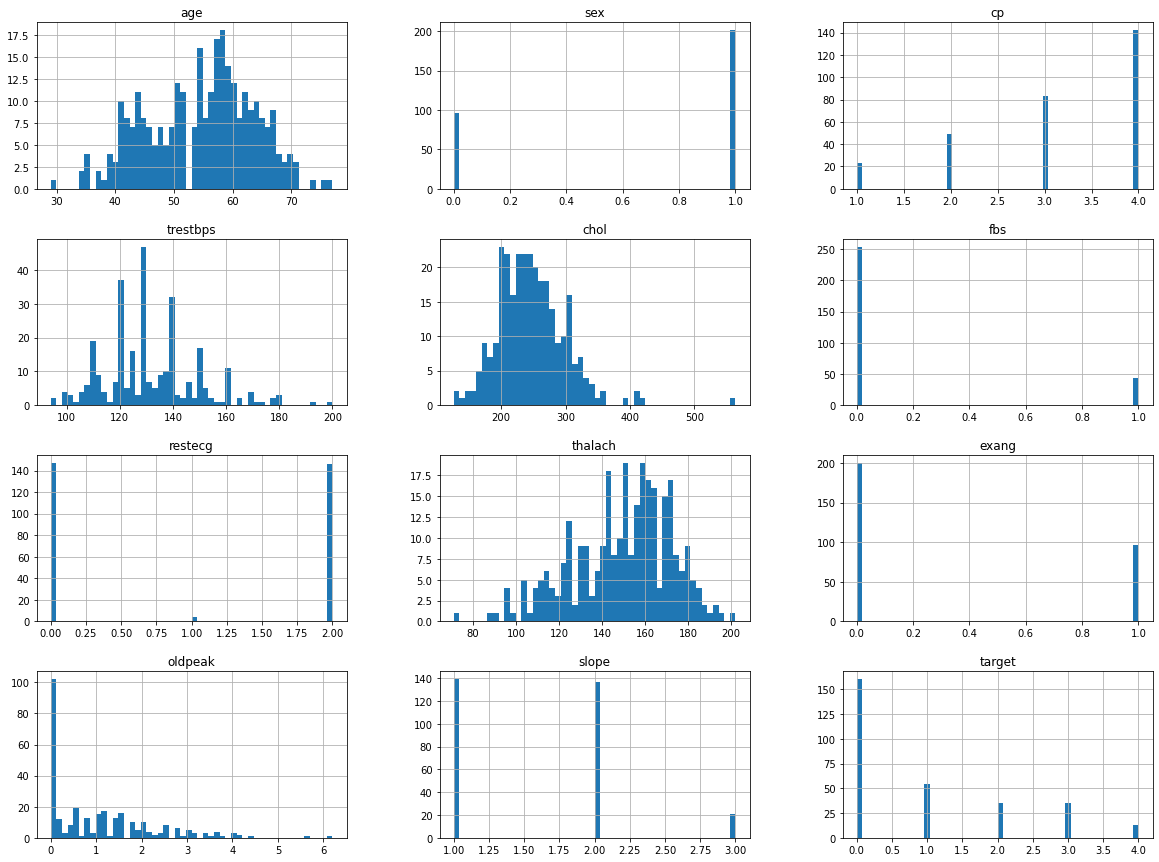

In [69]:
cleveland.hist(bins=50, figsize=(20,15))
plt.show()

In [71]:
heart = pd.read_csv('heart.csv')
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


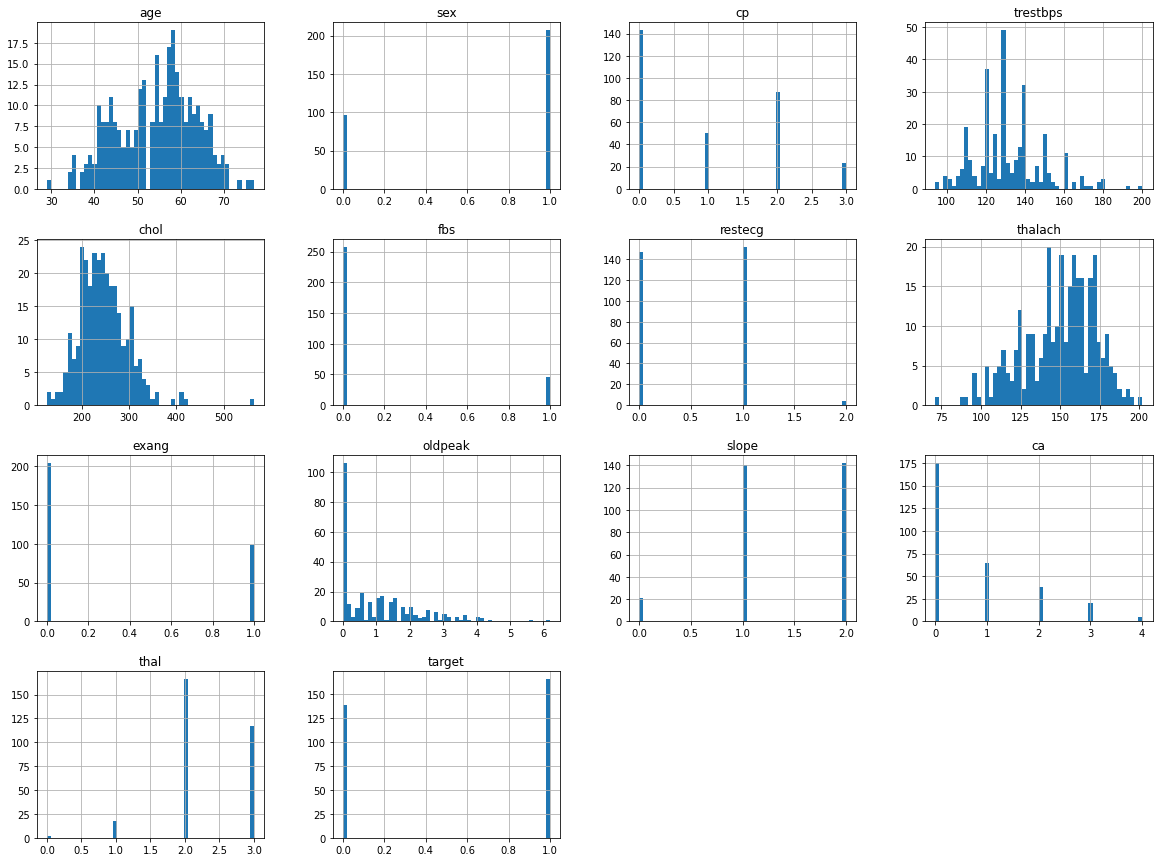

In [86]:
heart.hist(bins=50, figsize=(20,15))
plt.show()

In [87]:
heart.corr()["target"].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [110]:
x = heart.loc[:, heart.columns != 'target']
y = heart.target

x = pd.get_dummies(heart, columns=['sex','cp','fbs','restecg','exang','slope','ca','thal']).drop(['target'], axis=1)
x

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.2,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [113]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 1)

## Decision  Regressor

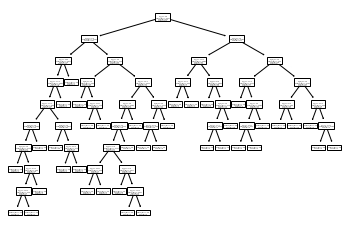

In [160]:
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(x_train, y_train)
plot_tree(dtr, class_names=test.columns)
y_pred = dtr.predict(x_test)

In [161]:
y_pred = dtr.predict(x_test)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("Feature Importance: ", pd.DataFrame(dtr.feature_importances_, index=x_train.columns))
print("Accuracy: ", accuracy_score(y_test, y_pred))

MSE:  0.29508196721311475
Feature Importance:                    0
age        0.059271
trestbps   0.105483
chol       0.092070
thalach    0.044633
oldpeak    0.064354
sex_0      0.000000
sex_1      0.046332
cp_0       0.311625
cp_1       0.000000
cp_2       0.000000
cp_3       0.000000
fbs_0      0.012313
fbs_1      0.000000
restecg_0  0.017151
restecg_1  0.000000
restecg_2  0.000000
exang_0    0.100855
exang_1    0.000000
slope_0    0.015397
slope_1    0.000000
slope_2    0.000000
ca_0       0.086802
ca_1       0.000000
ca_2       0.010711
ca_3       0.010261
ca_4       0.000000
thal_0     0.000000
thal_1     0.000000
thal_2     0.000000
thal_3     0.022742
Accuracy:  0.7049180327868853


In [156]:
depth = []
for i in range(1,20):
    dtr = DecisionTreeRegressor(max_depth=i)
    scores = cross_val_score(estimator=dtr, X=x, y=y, cv=10, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)

[(1, 0.02229515274049122), (2, 0.026933087256427977), (3, 0.030541555513821317), (4, 0.018451529672043877), (5, 0.017010959944349223), (6, 0.01767430439126828), (7, 0.00277777777777779), (8, 0.016666666666666673), (9, 0.00277777777777779), (10, 0.03055555555555557), (11, 0.00277777777777779), (12, 0.016666666666666673), (13, 0.03055555555555557), (14, 0.00277777777777779), (15, 0.03055555555555557), (16, 0.016666666666666673), (17, 0.00277777777777779), (18, 0.016666666666666673), (19, 0.016666666666666673)]


In [157]:
split = []
for i in range(2,20):
    dtr = DecisionTreeRegressor(min_samples_split=i)
    scores = cross_val_score(estimator=dtr, X=x, y=y, cv=10, n_jobs=4)
    split.append((i,scores.mean()))
print(split)

[(2, 0.00277777777777779), (3, 0.027083333333333348), (4, 0.01512345679012348), (5, 0.01512345679012348), (6, 0.011666666666666691), (7, 0.017743055555555574), (8, 0.011666666666666691), (9, 0.011666666666666691), (10, 0.005322359396433485), (11, 0.011111111111111127), (12, 0.012947658402203865), (13, 0.012947658402203865), (14, 0.012947658402203865), (15, 0.012805935046194806), (16, 0.014561368165264276), (17, 0.017336252424523545), (18, 0.017336252424523545), (19, 0.02156464748625193)]


In [158]:
leaf = []
for i in range(2,20):
    dtr = DecisionTreeRegressor(min_samples_leaf=i)
    scores = cross_val_score(estimator=dtr, X=x, y=y, cv=10, n_jobs=4)
    leaf.append((i,scores.mean()))
print(leaf)

[(2, 0.0012345679012345846), (3, 0.012160493827160501), (4, 0.018333333333333347), (5, 0.018408779149519904), (6, 0.015896399991780896), (7, 0.014757366395259763), (8, 0.017818768039250688), (9, 0.019485220371212288), (10, 0.02008535754542353), (11, 0.020181776278205898), (12, 0.024827992914475416), (13, 0.025362838410859366), (14, 0.025362838410859366), (15, 0.023509698615454398), (16, 0.023509698615454398), (17, 0.02737840443269427), (18, 0.02956561747218004), (19, 0.00943155455472433)]


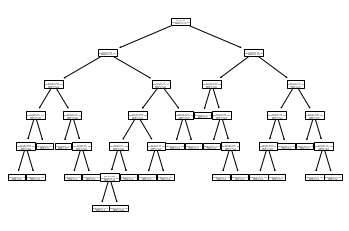

In [162]:
dtr = DecisionTreeRegressor(max_depth=6, min_samples_split=4, min_samples_leaf=4)
dtr.fit(x_train, y_train)
plot_tree(dtr, class_names=test.columns)
y_pred = dtr.predict(x_test)

In [163]:
y_pred = dtr.predict(x_test)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("Feature Importance: ", pd.DataFrame(dtr.feature_importances_, index=x_train.columns))
print("Accuracy: ", accuracy_score(y_test, np.rint(y_pred)))

MSE:  0.21729508196721312
Feature Importance:                    0
age        0.074055
trestbps   0.013267
chol       0.043752
thalach    0.054466
oldpeak    0.051064
sex_0      0.071570
sex_1      0.000000
cp_0       0.402011
cp_1       0.010067
cp_2       0.000000
cp_3       0.000000
fbs_0      0.000000
fbs_1      0.000000
restecg_0  0.000000
restecg_1  0.000000
restecg_2  0.000000
exang_0    0.000000
exang_1    0.130108
slope_0    0.000000
slope_1    0.012110
slope_2    0.000000
ca_0       0.111979
ca_1       0.000000
ca_2       0.000000
ca_3       0.000000
ca_4       0.000000
thal_0     0.000000
thal_1     0.000000
thal_2     0.000000
thal_3     0.025551
Accuracy:  0.7540983606557377


## Logistic Regression Model

In [164]:
from sklearn.linear_model import LogisticRegression

In [166]:
lr = LogisticRegression(random_state=1)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, np.rint(y_pred)))

MSE:  0.19672131147540983
Accuracy:  0.8032786885245902


/Users/jeffwang/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
